# North American(USA and Canada) Netflix User Dynamics:




### Overall Objective

To perform a comprehensive Exploratory Data Analysis (EDA) of Netflix's user base in the USA and Canada to understand key demographic, behavioral, and financial patterns, with a specific focus on identifying customer churn drivers, segmenting users by plan and device preference, and informing targeted marketing and customer retention strategies within these two North American markets.

### Specific Aims

The analysis is specifically designed to achieve the following aims:

* Analyze Customer Churn: To identify the factors correlating with churn, noting that users with lower monthly spending and shorter subscription durations present the primary churn risk.
* Segment User Demographics: To understand the distribution of users across different age groups, genders, and geographic locations. 
* Determine Subscription Preferences: To analyze the relationship between user age groups and their preferred subscription plans (Basic, Standard, Premium, Premium+), which is useful for targeted pricing and marketing.
* Identify Primary Access Method: To determine which primary device types (Mobile, Laptop, Smart TV, etc.) are most commonly used by subscribers to engage with the service, noting a strong preference for mobile and handheld devices for on-the-go viewing.
* Evaluate Acquisition Trends: To analyze new user acquisition rates over time, particularly identifying the peak period of new sign-ups.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.options.mode.copy_on_write = True

In [2]:
df = pd.read_csv("users.csv")

### Data Overview

In [3]:
df

,user_id,email,first_name,last_name,age,gender,country,state_province,city,subscription_plan,subscription_start_date,is_active,monthly_spend,primary_device,household_size,created_at
0,user_00001,figueroajohn@example.org,Erica,Garza,43.0,Male,USA,Massachusetts,North Jefferyhaven,Basic,2024-04-08,True,36.06,Laptop,1.0,2023-04-01 14:40:50.540242
1,user_00002,blakeerik@example.com,Joshua,Bernard,38.0,Male,USA,Texas,North Noahstad,Premium+,2024-05-24,True,14.59,Desktop,2.0,2024-10-10 15:39:11.030515
2,user_00003,smiller@example.net,Barbara,Williams,32.0,Female,USA,Michigan,Traciebury,Standard,2023-09-22,False,11.71,Desktop,3.0,2024-06-29 14:27:49.560875
3,user_00004,mitchellclark@example.com,Chelsea,Ferguson,11.0,Male,USA,Ohio,South Noah,Standard,2024-08-21,True,28.56,Laptop,2.0,2023-04-11 01:01:59.614841
4,user_00005,richard13@example.net,Jason,Foster,21.0,Female,USA,Arizona,West Donald,Standard,2024-10-28,True,9.54,Desktop,6.0,2025-04-12 19:59:30.137806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,user_04613,glawson@example.com,Diane,Thomas,8.0,Female,USA,Georgia,Wandamouth,Premium,2024-08-18,True,2.84,Desktop,3.0,2025-01-03 18:42:59.345803
10296,user_09468,mcox@example.org,Laurie,Young,37.0,Female,USA,North Carolina,Gomezshire,Basic,2022-09-27,False,13.76,Smart TV,2.0,2023-04-22 01:11:07.403510
10297,user_09414,mcdonaldkeith@example.net,James,Dillon,39.0,Male,USA,Tennessee,North Dennischester,Standard,2023-11-15,True,20.85,Tablet,2.0,2022-08-11 09:56:11.336213
10298,user_07950,adam74@example.net,Isaac,Cook,NaN,Female,Canada,Alberta,Ellenchester,Basic,2025-07-09,True,10.19,Smart TV,5.0,2024-12-09 21:10:19.694161


In [4]:
print("Total number of columns or features:",df.shape[1])

Total number of columns or features: 16


In [5]:
print("Total number of raws or records:",df.shape[0])

Total number of raws or records: 10300


In [6]:
print(df.columns)

Index(['user_id', 'email', 'first_name', 'last_name', 'age', 'gender',
       'country', 'state_province', 'city', 'subscription_plan',
       'subscription_start_date', 'is_active', 'monthly_spend',
       'primary_device', 'household_size', 'created_at'],
      dtype='object')


In [7]:
df.sample()

,user_id,email,first_name,last_name,age,gender,country,state_province,city,subscription_plan,subscription_start_date,is_active,monthly_spend,primary_device,household_size,created_at
5688,user_05689,vflynn@example.com,Keith,Martinez,31.0,Other,USA,Tennessee,New Kylefurt,Premium,2024-05-04,True,19.35,Tablet,3.0,2022-08-18 12:44:11.586939


In [8]:
df.head()

,user_id,email,first_name,last_name,age,gender,country,state_province,city,subscription_plan,subscription_start_date,is_active,monthly_spend,primary_device,household_size,created_at
0,user_00001,figueroajohn@example.org,Erica,Garza,43.0,Male,USA,Massachusetts,North Jefferyhaven,Basic,2024-04-08,True,36.06,Laptop,1.0,2023-04-01 14:40:50.540242
1,user_00002,blakeerik@example.com,Joshua,Bernard,38.0,Male,USA,Texas,North Noahstad,Premium+,2024-05-24,True,14.59,Desktop,2.0,2024-10-10 15:39:11.030515
2,user_00003,smiller@example.net,Barbara,Williams,32.0,Female,USA,Michigan,Traciebury,Standard,2023-09-22,False,11.71,Desktop,3.0,2024-06-29 14:27:49.560875
3,user_00004,mitchellclark@example.com,Chelsea,Ferguson,11.0,Male,USA,Ohio,South Noah,Standard,2024-08-21,True,28.56,Laptop,2.0,2023-04-11 01:01:59.614841
4,user_00005,richard13@example.net,Jason,Foster,21.0,Female,USA,Arizona,West Donald,Standard,2024-10-28,True,9.54,Desktop,6.0,2025-04-12 19:59:30.137806


In [9]:
df.tail()

,user_id,email,first_name,last_name,age,gender,country,state_province,city,subscription_plan,subscription_start_date,is_active,monthly_spend,primary_device,household_size,created_at
10295,user_04613,glawson@example.com,Diane,Thomas,8.0,Female,USA,Georgia,Wandamouth,Premium,2024-08-18,True,2.84,Desktop,3.0,2025-01-03 18:42:59.345803
10296,user_09468,mcox@example.org,Laurie,Young,37.0,Female,USA,North Carolina,Gomezshire,Basic,2022-09-27,False,13.76,Smart TV,2.0,2023-04-22 01:11:07.403510
10297,user_09414,mcdonaldkeith@example.net,James,Dillon,39.0,Male,USA,Tennessee,North Dennischester,Standard,2023-11-15,True,20.85,Tablet,2.0,2022-08-11 09:56:11.336213
10298,user_07950,adam74@example.net,Isaac,Cook,NaN,Female,Canada,Alberta,Ellenchester,Basic,2025-07-09,True,10.19,Smart TV,5.0,2024-12-09 21:10:19.694161
10299,user_09958,debraking@example.com,Amber,Phillips,35.0,Male,USA,Pennsylvania,Rogerberg,Premium+,2024-11-04,True,8.57,Mobile,5.0,2024-07-21 03:27:05.398770


In [10]:
df.dtypes

user_id                     object
email                       object
first_name                  object
last_name                   object
age                        float64
gender                      object
country                     object
state_province              object
city                        object
subscription_plan           object
subscription_start_date     object
is_active                     bool
monthly_spend              float64
primary_device              object
household_size             float64
created_at                  object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  10300 non-null  object 
 1   email                    10300 non-null  object 
 2   first_name               10300 non-null  object 
 3   last_name                10300 non-null  object 
 4   age                      9071 non-null   float64
 5   gender                   9476 non-null   object 
 6   country                  10300 non-null  object 
 7   state_province           10300 non-null  object 
 8   city                     10300 non-null  object 
 9   subscription_plan        10300 non-null  object 
 10  subscription_start_date  10300 non-null  object 
 11  is_active                10300 non-null  bool   
 12  monthly_spend            9283 non-null   float64
 13  primary_device           10300 non-null  object 
 14  household_size        

In [12]:
# descriptive statistics

df.describe()

,age,monthly_spend,household_size
count,9071.000000,9283.000000,8755.000000
mean,35.039466,22.146445,2.863392
std,12.580667,65.723824,1.563251
min,-7.000000,0.110000,1.000000
25%,27.000000,7.745000,2.000000
50%,35.000000,13.530000,2.000000
75%,43.000000,21.620000,4.000000
max,109.000000,997.800000,8.000000


In [13]:
# descriptive statistics for categorical columns

df.describe(include="object")

,user_id,email,first_name,last_name,gender,country,state_province,city,subscription_plan,subscription_start_date,primary_device,created_at
count,10300,10300,10300,10300,9476,10300,10300,10300,10300,10300,10300,10300
unique,10000,9789,651,989,4,2,30,7762,4,1096,6,10000
top,user_01756,zwilliams@example.org,Michael,Smith,Female,USA,North Carolina,North Michael,Standard,2025-02-18,Desktop,2024-07-24 12:44:25.884428
freq,3,3,239,214,4324,7204,416,14,3625,22,1807,3


In [14]:
# number of unique values in each columns

print(df.nunique())

user_id                    10000
email                       9789
first_name                   651
last_name                    989
age                           97
gender                         4
country                        2
state_province                30
city                        7762
subscription_plan              4
subscription_start_date     1096
is_active                      2
monthly_spend               3488
primary_device                 6
household_size                 8
created_at                 10000
dtype: int64


In [15]:
# total number of duplicates in the dataset

print(df.duplicated().sum())

300


In [16]:
# total number of unique values in te dataset

print(df.nunique().sum())

43928


In [17]:
# number of missing values in each columns

print(df.isna().sum())

user_id                       0
email                         0
first_name                    0
last_name                     0
age                        1229
gender                      824
country                       0
state_province                0
city                          0
subscription_plan             0
subscription_start_date       0
is_active                     0
monthly_spend              1017
primary_device                0
household_size             1545
created_at                    0
dtype: int64


In [18]:
# oldest subscriber

df.loc[df["age"].idxmax()]

user_id                                    user_08221
email                           melissa11@example.net
first_name                                      Jesus
last_name                                       Jones
age                                             109.0
gender                                          Other
country                                        Canada
state_province                          New Brunswick
city                                     Elizabethton
subscription_plan                               Basic
subscription_start_date                    2024-08-18
is_active                                        True
monthly_spend                                   16.89
primary_device                         Gaming Console
household_size                                    NaN
created_at                 2025-07-13 19:31:24.115304
Name: 8220, dtype: object

In [19]:
# highest spending subscriber details

df.loc[df["monthly_spend"].idxmax()]

user_id                                    user_00777
email                             opierce@example.com
first_name                                    Randall
last_name                                      Austin
age                                              49.0
gender                                         Female
country                                           USA
state_province                               Michigan
city                                       Marioshire
subscription_plan                             Premium
subscription_start_date                    2025-03-27
is_active                                        True
monthly_spend                                   997.8
primary_device                                Desktop
household_size                                    3.0
created_at                 2024-10-03 00:45:10.840541
Name: 776, dtype: object

### Handling Misinng Values

In [20]:
# Handling missing values in "age" column

df["age"] = df["age"].fillna(df["age"].median())

In [21]:
# Handling missing valus in "gender" column

df["gender"] = df["gender"].fillna("Unknown")

In [22]:
# Handling missing values in "monthly_spend" column

df["monthly_spend"] = df["monthly_spend"].fillna(df["monthly_spend"].mean())

In [23]:
# Handling missing values in "household_size" column

df["household_size"] = df["household_size"].fillna(df["household_size"].median())

In [24]:
df.isna().sum()

user_id                    0
email                      0
first_name                 0
last_name                  0
age                        0
gender                     0
country                    0
state_province             0
city                       0
subscription_plan          0
subscription_start_date    0
is_active                  0
monthly_spend              0
primary_device             0
household_size             0
created_at                 0
dtype: int64

### Removing Duplicates

In [25]:
print(df.duplicated().sum())

300


In [26]:
# Removing duplicates from the dataset

df = df.drop_duplicates() 

In [27]:
print(df.duplicated().sum())

0


In [28]:
# removing irrelevent records

df = df.drop(df[df["age"] < 1].index)

### Converting Data Types

In [29]:
df.dtypes

user_id                     object
email                       object
first_name                  object
last_name                   object
age                        float64
gender                      object
country                     object
state_province              object
city                        object
subscription_plan           object
subscription_start_date     object
is_active                     bool
monthly_spend              float64
primary_device              object
household_size             float64
created_at                  object
dtype: object

In [30]:
# converting "subscription_start_date" datatype to datetime64

df["subscription_start_date"] = pd.to_datetime(df["subscription_start_date"])

In [31]:
# converting "created_at" datatype to datetime64

df["created_at"] = pd.to_datetime(df["created_at"])

In [32]:
#coverting "age" datatype to int64

df["age"] = df["age"].astype("int64")

In [33]:
df.dtypes

user_id                            object
email                              object
first_name                         object
last_name                          object
age                                 int64
gender                             object
country                            object
state_province                     object
city                               object
subscription_plan                  object
subscription_start_date    datetime64[ns]
is_active                            bool
monthly_spend                     float64
primary_device                     object
household_size                    float64
created_at                 datetime64[ns]
dtype: object

### Creating Derived Columns

In [34]:
# today's date

today = pd.to_datetime("today")

In [35]:
# calculating active days

last_recorded_date = pd.to_datetime("2025-08-01") # last recorded date

df["active_days"] = (last_recorded_date - df["created_at"]).dt.days

In [36]:
# calculating subscription duration in months

df["subscription_duration_months"] = ((last_recorded_date - df["subscription_start_date"]).dt.days // 30 )

In [37]:
df["age_group"] = pd.cut(df["age"], bins=[0,18,30,40,50,60,109],
                         labels = ["0-18","19-30","31-40","41-50","50-60","60+"])

In [38]:
df

,user_id,email,first_name,last_name,age,gender,country,state_province,city,subscription_plan,subscription_start_date,is_active,monthly_spend,primary_device,household_size,created_at,active_days,subscription_duration_months,age_group
0,user_00001,figueroajohn@example.org,Erica,Garza,43,Male,USA,Massachusetts,North Jefferyhaven,Basic,2024-04-08,True,36.06,Laptop,1.0,2023-04-01 14:40:50.540242,852,16,41-50
1,user_00002,blakeerik@example.com,Joshua,Bernard,38,Male,USA,Texas,North Noahstad,Premium+,2024-05-24,True,14.59,Desktop,2.0,2024-10-10 15:39:11.030515,294,14,31-40
2,user_00003,smiller@example.net,Barbara,Williams,32,Female,USA,Michigan,Traciebury,Standard,2023-09-22,False,11.71,Desktop,3.0,2024-06-29 14:27:49.560875,397,22,31-40
3,user_00004,mitchellclark@example.com,Chelsea,Ferguson,11,Male,USA,Ohio,South Noah,Standard,2024-08-21,True,28.56,Laptop,2.0,2023-04-11 01:01:59.614841,842,11,0-18
4,user_00005,richard13@example.net,Jason,Foster,21,Female,USA,Arizona,West Donald,Standard,2024-10-28,True,9.54,Desktop,6.0,2025-04-12 19:59:30.137806,110,9,19-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,user_09996,jessicaestrada@example.org,Joshua,Harrison,46,Female,USA,Texas,Luistown,Premium+,2024-07-09,True,5.13,Desktop,2.0,2022-10-13 00:19:59.664856,1022,12,41-50
9996,user_09997,lewisroger@example.com,Steven,Thompson,35,Male,USA,Florida,Brownmouth,Basic,2025-07-17,True,13.82,Laptop,1.0,2022-08-25 19:58:08.326565,1071,0,31-40
9997,user_09998,lisa14@example.com,Nancy,Galloway,33,Male,USA,North Carolina,Tinaland,Standard,2023-10-04,True,12.10,Smart TV,2.0,2025-05-28 10:02:35.235233,64,22,31-40
9998,user_09999,kscott@example.org,Rhonda,Mckenzie,30,Female,Canada,British Columbia,Port Jeanetteview,Premium,2025-05-12,True,14.73,Desktop,1.0,2024-07-14 10:36:03.719715,382,2,19-30


### Filtering Data

In [39]:
# filtering premium+ subscribers

df[df["subscription_plan"] == "Premium+"]

,user_id,email,first_name,last_name,age,gender,country,state_province,city,subscription_plan,subscription_start_date,is_active,monthly_spend,primary_device,household_size,created_at,active_days,subscription_duration_months,age_group
1,user_00002,blakeerik@example.com,Joshua,Bernard,38,Male,USA,Texas,North Noahstad,Premium+,2024-05-24,True,14.590000,Desktop,2.0,2024-10-10 15:39:11.030515,294,14,31-40
19,user_00020,vpham@example.org,Erik,Reyes,31,Female,USA,Indiana,Walkermouth,Premium+,2023-07-02,True,11.320000,Tablet,2.0,2023-04-04 07:58:29.582072,849,25,31-40
21,user_00022,jessica56@example.net,Paul,Scott,33,Male,USA,Florida,New Saraside,Premium+,2023-09-05,True,22.146445,Gaming Console,2.0,2025-06-07 18:30:35.952797,54,23,31-40
24,user_00025,cardenaskaren@example.net,Jeffrey,Hernandez,36,Male,USA,New York,South Cheryl,Premium+,2023-12-14,False,11.970000,Tablet,2.0,2024-09-28 04:14:08.236240,306,19,31-40
30,user_00031,michellewhite@example.com,Mark,Murphy,26,Male,USA,Massachusetts,Karenchester,Premium+,2025-02-02,True,18.190000,Tablet,2.0,2022-08-24 07:25:10.816748,1072,6,19-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,user_09967,jonathan50@example.com,Tina,Nguyen,31,Male,Canada,Manitoba,Lake Yvetteside,Premium+,2024-09-26,True,9.890000,Mobile,5.0,2025-01-14 02:25:42.718388,198,10,31-40
9978,user_09979,crawfordglenn@example.net,Caitlin,Gallagher,27,Female,Canada,Prince Edward Island,Rileyborough,Premium+,2023-08-19,True,15.300000,Desktop,4.0,2024-01-31 17:20:49.209460,547,23,19-30
9989,user_09990,wwilliams@example.com,Mark,Huffman,35,Unknown,USA,Wisconsin,Wardshire,Premium+,2024-07-26,False,21.180000,Laptop,2.0,2025-04-18 21:28:59.985650,104,12,31-40
9990,user_09991,briana35@example.com,Kenneth,Miller,38,Female,USA,Indiana,Mitchellmouth,Premium+,2024-04-10,True,12.730000,Mobile,4.0,2024-10-28 17:32:01.138519,276,15,31-40


In [40]:
# filtering below 18 subscribers

df[df["age"]<18]

,user_id,email,first_name,last_name,age,gender,country,state_province,city,subscription_plan,subscription_start_date,is_active,monthly_spend,primary_device,household_size,created_at,active_days,subscription_duration_months,age_group
3,user_00004,mitchellclark@example.com,Chelsea,Ferguson,11,Male,USA,Ohio,South Noah,Standard,2024-08-21,True,28.56,Laptop,2.0,2023-04-11 01:01:59.614841,842,11,0-18
100,user_00101,angela16@example.net,Kathy,Bryan,14,Male,USA,Illinois,North Phillip,Premium+,2024-04-04,True,28.98,Smart TV,1.0,2024-11-07 07:13:21.893715,266,16,0-18
107,user_00108,gutierrezjennifer@example.org,Adam,Russell,13,Female,USA,Florida,Santosport,Premium,2023-06-10,True,10.47,Desktop,7.0,2025-04-23 21:57:52.734389,99,26,0-18
125,user_00126,combscharles@example.net,Kathy,Taylor,6,Other,Canada,Saskatchewan,Lake Edwardborough,Premium,2023-09-15,True,10.26,Laptop,2.0,2024-07-25 11:04:37.787323,371,22,0-18
134,user_00135,stephentaylor@example.org,Martin,Brock,16,Male,USA,Georgia,Cookberg,Premium,2023-07-19,True,15.86,Gaming Console,2.0,2024-01-09 22:20:43.946604,569,24,0-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9935,user_09936,njohnson@example.com,Eric,Gallegos,15,Male,USA,Tennessee,West Brian,Standard,2022-08-19,True,7.08,Tablet,3.0,2023-02-16 18:36:43.821524,896,35,0-18
9938,user_09939,lisa84@example.com,Matthew,Beard,15,Female,USA,Ohio,Brandontown,Standard,2023-03-07,True,17.81,Smart TV,4.0,2024-12-13 10:47:07.480266,230,29,0-18
9965,user_09966,rebeccatorres@example.com,Nicholas,Jacobson,8,Male,USA,New York,Taylorfort,Premium,2025-03-24,True,12.11,Mobile,2.0,2024-08-29 20:25:00.668683,336,4,0-18
9973,user_09974,carol27@example.com,David,White,15,Male,USA,Virginia,Colinborough,Premium,2023-01-16,True,24.78,Desktop,1.0,2023-06-25 12:25:24.378226,767,30,0-18


In [41]:
# filtering subscribers who active more than 1000 days

df[df["active_days"]>1000]

,user_id,email,first_name,last_name,age,gender,country,state_province,city,subscription_plan,subscription_start_date,is_active,monthly_spend,primary_device,household_size,created_at,active_days,subscription_duration_months,age_group
14,user_00015,barnesbrandy@example.net,Sarah,Santiago,45,Female,Canada,Alberta,West Randy,Basic,2023-12-16,False,5.140000,Mobile,3.0,2022-08-13 06:39:47.240847,1083,19,41-50
20,user_00021,emurphy@example.com,Darlene,Frazier,38,Female,Canada,Alberta,North Natalieview,Basic,2024-04-29,True,17.240000,Laptop,3.0,2022-09-13 23:45:07.830930,1052,15,31-40
29,user_00030,brobinson@example.com,Paul,Ramsey,24,Unknown,USA,Indiana,New Amanda,Premium,2024-05-11,True,10.170000,Laptop,4.0,2022-11-03 01:16:54.703949,1001,14,19-30
30,user_00031,michellewhite@example.com,Mark,Murphy,26,Male,USA,Massachusetts,Karenchester,Premium+,2025-02-02,True,18.190000,Tablet,2.0,2022-08-24 07:25:10.816748,1072,6,19-30
62,user_00063,judyfox@example.net,Thomas,Palmer,26,Unknown,Canada,New Brunswick,Gordonton,Standard,2023-12-17,True,20.260000,Gaming Console,2.0,2022-10-08 17:14:05.979190,1027,19,19-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,user_09956,anneellis@example.net,Michael,Bonilla,35,Male,USA,Ohio,Katieville,Basic,2024-04-06,False,22.146445,Tablet,2.0,2022-09-14 00:04:41.086933,1051,16,31-40
9976,user_09977,vegamichael@example.net,Deanna,Ford,52,Male,Canada,Newfoundland and Labrador,Navarrohaven,Premium,2023-10-10,True,17.720000,Tablet,5.0,2022-08-22 21:10:58.963991,1074,22,50-60
9984,user_09985,wendyvance@example.org,Kimberly,Jackson,8,Male,USA,Arizona,Sharontown,Basic,2022-09-03,True,12.250000,Laptop,3.0,2022-09-21 11:07:55.008495,1044,35,0-18
9995,user_09996,jessicaestrada@example.org,Joshua,Harrison,46,Female,USA,Texas,Luistown,Premium+,2024-07-09,True,5.130000,Desktop,2.0,2022-10-13 00:19:59.664856,1022,12,41-50


### Univariate Analysis

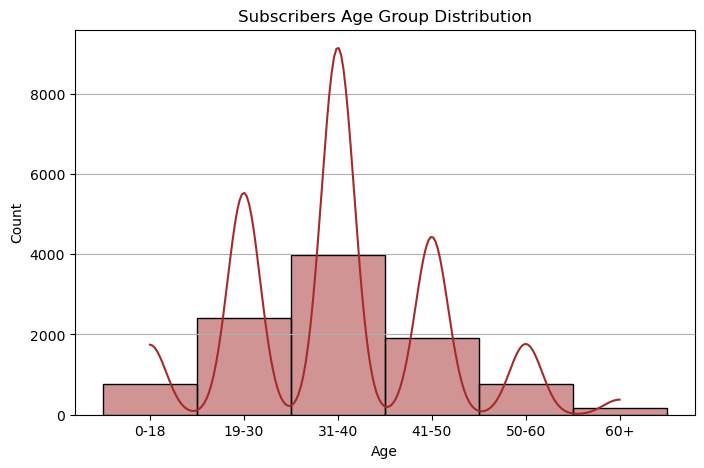

C:\Users\SAFWAN\AppData\Local\Temp\ipykernel_16904\3245612897.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group").size()


age_group
0-18      757
19-30    2399
31-40    3970
41-50    1924
50-60     765
60+       163
dtype: int64

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(df["age_group"],bins=20,kde=True,color="brown")
plt.title("Subscribers Age Group Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis="y")
plt.show()

df.groupby("age_group").size()

#### Insights:

* The most common age group for subscribers is 31-40. this group has the tallest bar and the highest peak on the density curve, with a count of close to 4,000 (but less than 4,000) subscribers.

* ​The 60+ group has the fewest subscribers, with a count close to zero.

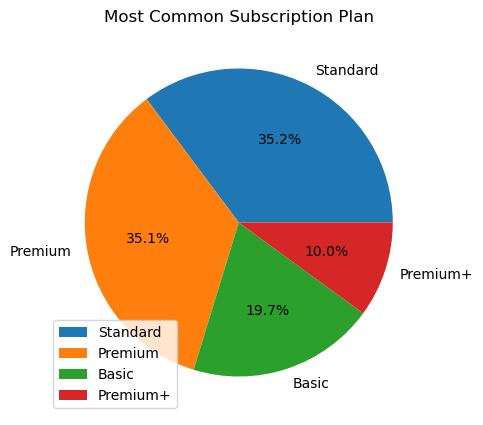

subscription_plan
Standard    3513
Premium     3498
Basic       1965
Premium+    1002
Name: count, dtype: int64

In [43]:
plt.figure(figsize=(8,5))
count= df["subscription_plan"].value_counts()
plt.pie(count,labels=count.index,autopct="%1.1f%%")
plt.title("Most Common Subscription Plan")
plt.legend(loc="lower left")
plt.show()

df["subscription_plan"].value_counts()         

#### Insights:

* The Standard (35.2%) and Premium (35.1%) plans are the most popular and are nearly tied for first place. Together, they make up over 70% of all subscribers.

* The Basic plan is the third most common (19.7%).

* The Premium+ plan is the least popular, making up only 10% of subscribers.

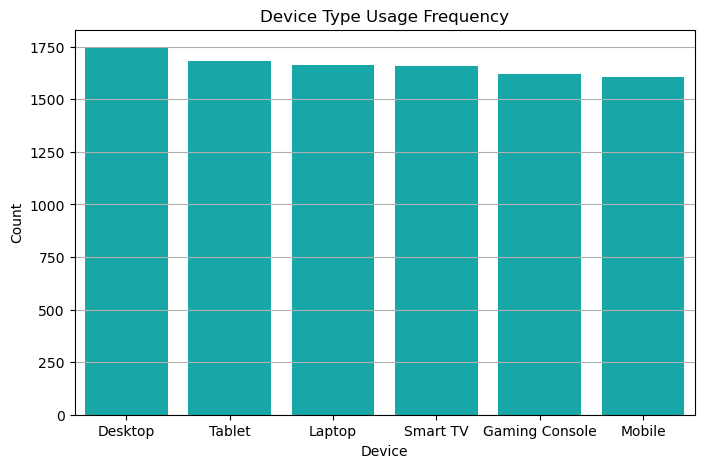

primary_device
Desktop           1744
Tablet            1682
Laptop            1662
Smart TV          1661
Gaming Console    1621
Mobile            1608
Name: count, dtype: int64

In [44]:
count = df["primary_device"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(data=count,color="c")
plt.title("Device Type Usage Frequency")
plt.xlabel("Device")
plt.ylabel("Count")
plt.grid(axis="y")
plt.show()

df["primary_device"].value_counts()

#### Insights:

* All six device types is very similar, ranging from about 1,600 to 1,750 counts. The bars are almost the same height.

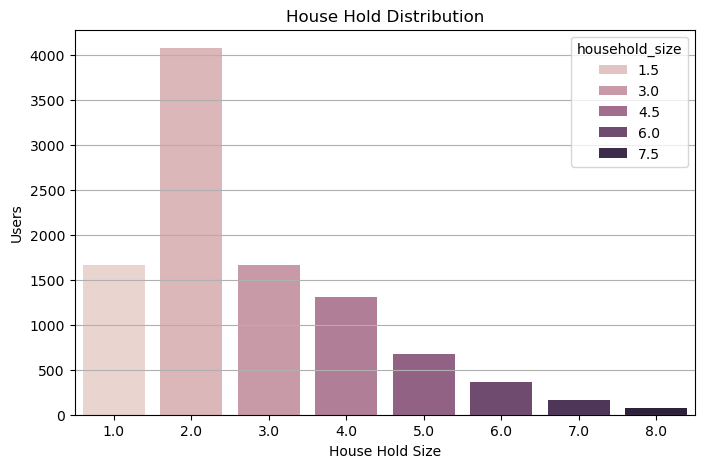

household_size
1.0    1663
2.0    4072
3.0    1661
4.0    1308
5.0     676
6.0     362
7.0     166
8.0      70
dtype: int64

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x="household_size",data=df,hue="household_size")
plt.title("House Hold Distribution")
plt.xlabel("House Hold Size")
plt.ylabel("Users")
plt.grid(axis="y")
plt.show()

df.groupby("household_size").size()

#### Insights:

* The most common household size is 2.0 people, with over 4,000 users. This group is by far the largest.

* Household sizes of 1.0 person (about 1,663 users) and 3.0 people (about 1,661 users) are the next most common and are nearly equal in count.

* The number of users drops quickly as the household size increases past 3.0. Households of 6.0, 7.0, and 8.0 people have the fewest users (all below 500).

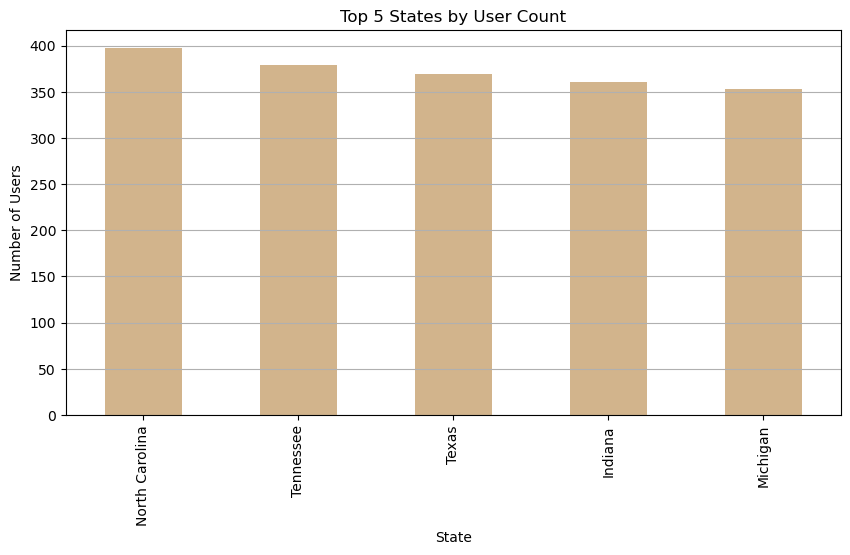

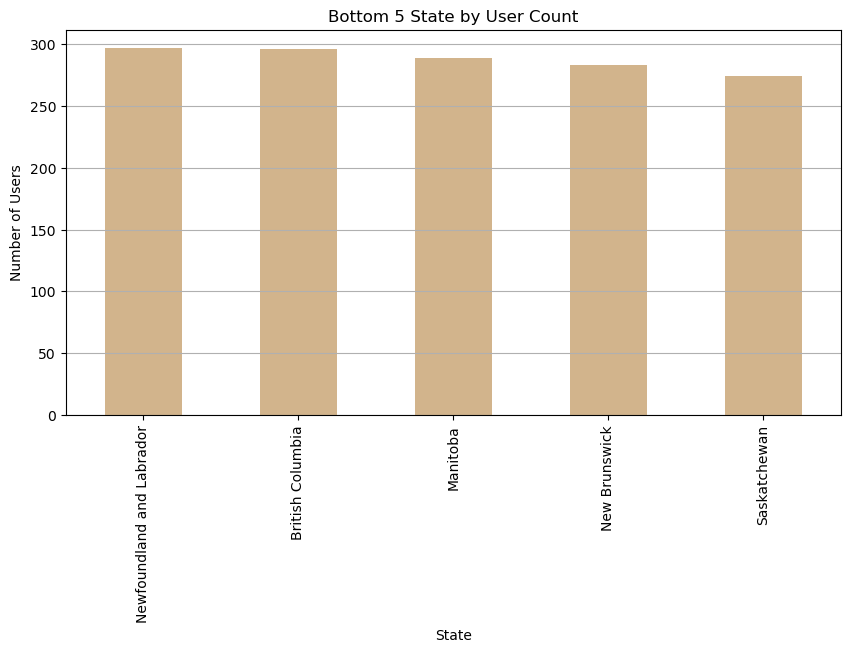

In [46]:
top_states = df["state_province"].value_counts().head(5)
top_states.plot(kind="bar",color="tan",figsize=(10,5))
plt.title("Top 5 States by User Count")
plt.xlabel("State")
plt.ylabel("Number of Users")
plt.grid(axis="y")
plt.show()

top_states = df["state_province"].value_counts().tail(5)
top_states.plot(kind="bar",color="tan",figsize=(10,5))
plt.title("Bottom 5 State by User Count")
plt.xlabel("State")
plt.ylabel("Number of Users")
plt.grid(axis="y")
plt.show()

#### Insights:

* north Carolina has the highest user count with apprximately 400

* saskatchewan has the absolute lowest user count with apprximately 280

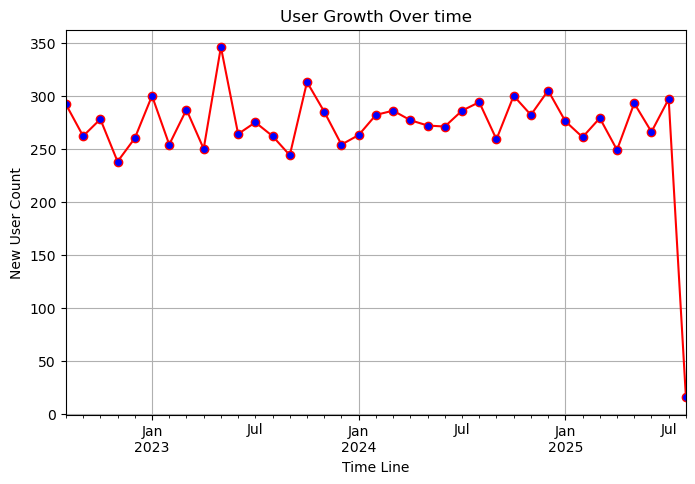

signup_month
2022-08    292
2022-09    262
2022-10    278
2022-11    238
2022-12    260
2023-01    300
2023-02    254
2023-03    287
2023-04    250
2023-05    346
2023-06    264
2023-07    275
2023-08    262
2023-09    244
2023-10    313
2023-11    285
2023-12    254
2024-01    263
2024-02    282
2024-03    286
2024-04    277
2024-05    272
2024-06    271
2024-07    286
2024-08    294
2024-09    259
2024-10    300
2024-11    282
2024-12    305
2025-01    276
2025-02    261
2025-03    279
2025-04    249
2025-05    293
2025-06    266
2025-07    297
2025-08     16
Freq: M, dtype: int64

In [47]:
df["signup_month"] = df["created_at"].dt.to_period("M")
growth_timeline = df.groupby("signup_month").size()
plt.figure(figsize=(8,5))
growth_timeline.plot(kind="line",color="r",marker="o",mfc="b")
plt.title("User Growth Over time")
plt.xlabel("Time Line")
plt.ylabel("New User Count")
plt.grid()
plt.show() 

df.groupby("signup_month").size()

#### Insights:

*  For the vast majority of the time period shown (from the start of 2023 up to mid-2025), the new user count is quite stable.

* Most of the monthly new user counts fluctuate roughly between 250 and 300 users. This suggests a healthy, consistent rate of user acquisition over the two and a half years shown.

* The company had its best month ever for sign-ups in the middle of 2023, reaching about 350 new users.

* In the last month shown, the number of new sign-ups suddenly dropped to almost zero. 

### Bivariate Analysis

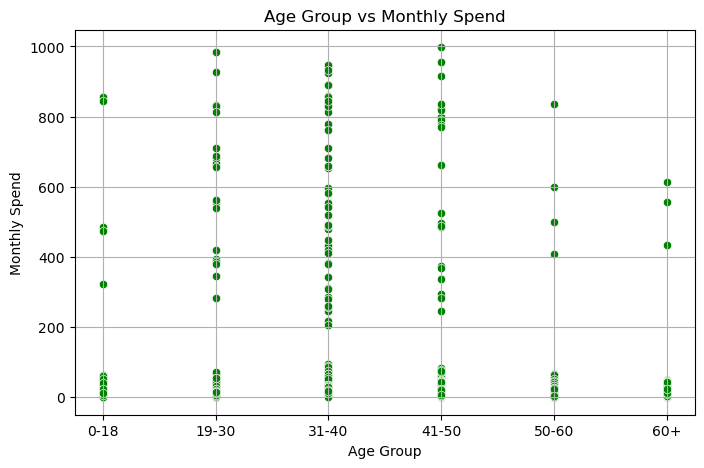

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="age_group", y="monthly_spend", data=df, color="g")
plt.title("Age Group vs Monthly Spend")
plt.xlabel("Age Group")
plt.ylabel("Monthly Spend")
plt.grid()
plt.show()

#### Insights:

* The majority of individuals in every age group are low-to-moderate monthly spenders. for almost all age groups, there is a very high concentration of data points near the bottom of the graph (spending close to $0 to $100).

* The age groups 19-30, 31-40 and 41-50 appear to have the most spread and the highest number of data points, suggesting this is where the largest number of customers or data points fall, and they show a wide variety of spending habits (from near 0 up to 1000).

* The maximum monthly spend, close to $1000, is observed across the three central age groups

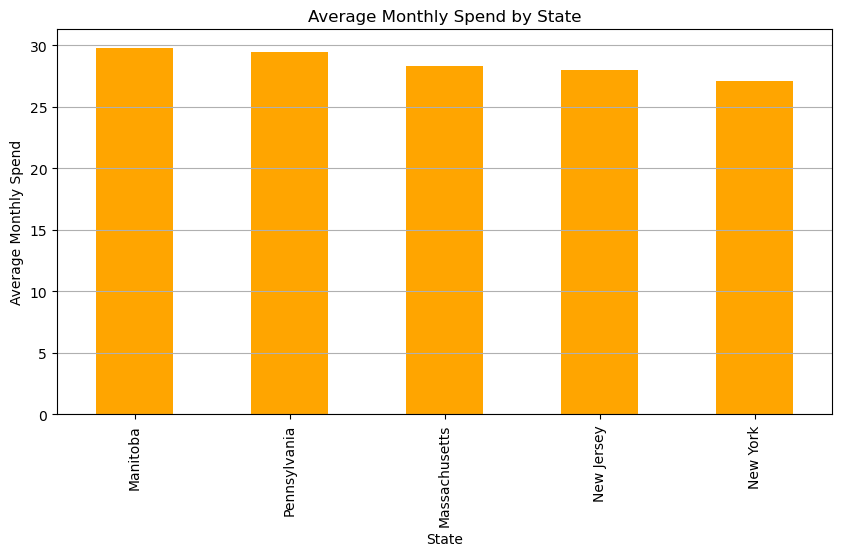

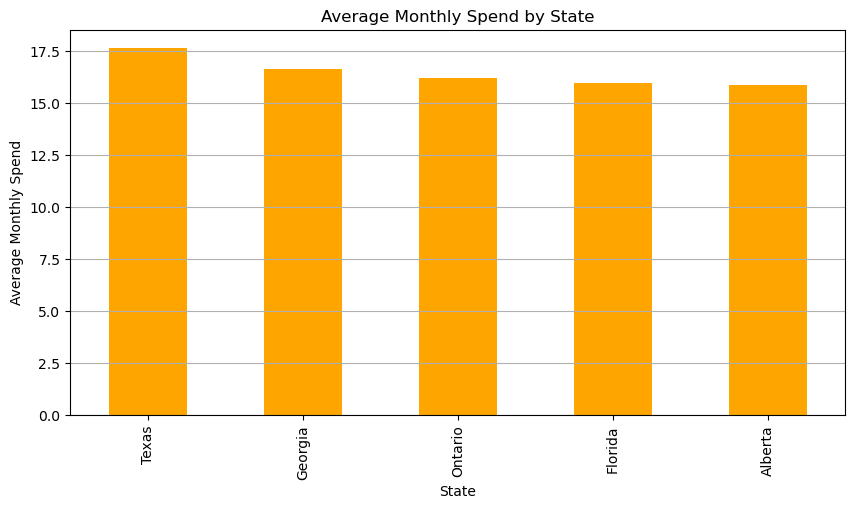

In [49]:
state_spend = df.groupby('state_province')['monthly_spend'].mean().sort_values(ascending=False).head(5)
state_spend.plot(kind='bar',color="orange", figsize=(10,5))
plt.title("Average Monthly Spend by State")
plt.xlabel("State")
plt.ylabel("Average Monthly Spend")
plt.grid(axis="y")
plt.show()

state_spend = df.groupby('state_province')['monthly_spend'].mean().sort_values(ascending=False).tail(5)
state_spend.plot(kind='bar',color="orange", figsize=(10,5))
plt.title("Average Monthly Spend by State")
plt.xlabel("State")
plt.ylabel("Average Monthly Spend")
plt.grid(axis="y")
plt.show()


#### Insights:

* manitoba has the highest average monthly spend with apprximately 30 dollar

* alberta has the lowest average monthly spend with apprximately 17 dollar

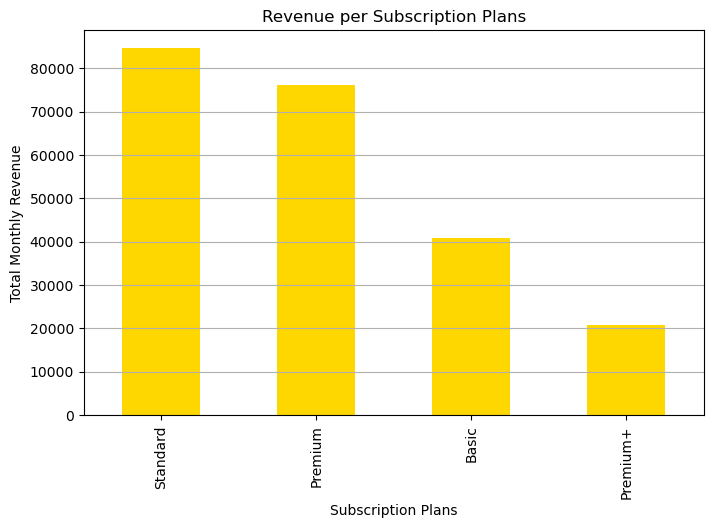

subscription_plan
Basic       40835.289688
Premium     76056.344894
Premium+    20697.638298
Standard    84605.024229
Name: monthly_spend, dtype: float64

In [50]:
revenue_per_plan = df.groupby("subscription_plan")["monthly_spend"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
revenue_per_plan.plot(kind="bar",color="gold")
plt.title("Revenue per Subscription Plans")
plt.xlabel("Subscription Plans")
plt.ylabel("Total Monthly Revenue")
plt.grid(axis="y")
plt.show()

df.groupby("subscription_plan")["monthly_spend"].sum()

#### Insights:

* The Standard plan is the highest revenue generator, bringing in 84,605 dollar monthly.

* The Premium plan is the second highest, generating 76,056 dollar monthly.

* Together, Standard and Premium plans account for the vast majority of total monthly revenue.

* The Premium+ plan generates the least amount of revenue, at 20,697 dollar monthly.

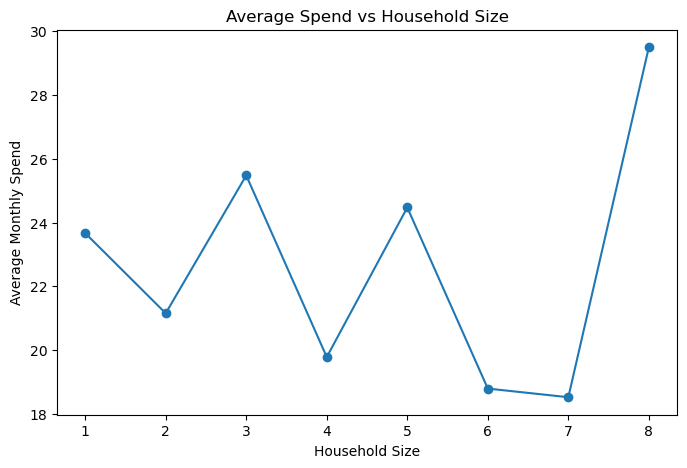

In [80]:
household_trend = df.groupby("household_size")["monthly_spend"].mean()
plt.figure(figsize=(8,5))
plt.plot(household_trend.index, household_trend.values, marker="o")
plt.title("Average Spend vs Household Size")
plt.xlabel("Household Size")
plt.ylabel("Average Monthly Spend")
plt.show()

#### Insight:

* Households of size 7 have the lowest average monthly spend, at just above $18.

* Households of size 8 are the biggest spenders, with their average monthly spend soaring up to nearly $29.

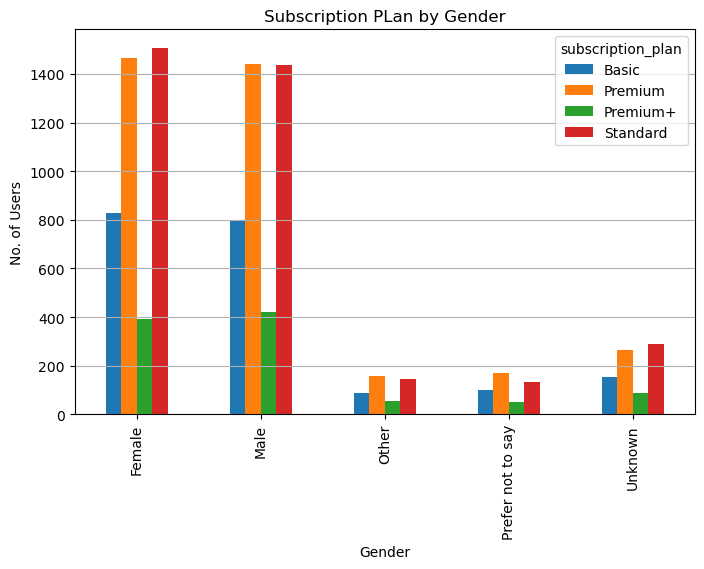

subscription_plan,Basic,Premium,Premium+,Standard
gender,,,,
Female,827,1466,392,1508
Male,795,1439,419,1435
Other,87,158,53,146
Prefer not to say,101,169,52,134
Unknown,155,266,86,290


In [51]:
gender_plan = pd.crosstab(df["gender"],df["subscription_plan"])
gender_plan.plot(kind="bar",figsize=(8,5))
plt.title("Subscription PLan by Gender")
plt.xlabel("Gender")
plt.ylabel("No. of Users")
plt.grid(axis="y")
plt.show()

pd.crosstab(df["gender"],df["subscription_plan"])

#### Insights:

* The Other, Prefer not to say, and Unknown gender groups have a much lower number of users overall compared to the Female and Male groups.

* Female users show a slight preference for the Standard plan (1,508 users) over the Premium plan (1,466 users).

* Male users show a slight preference for the Premium plan (1,439 users) over the Standard plan (1,435 users).

* In the two main groups (Female and Male), subscription preferences are nearly identical in volume and ranking, suggesting gender is not a strong factor in plan choice.

* Premium+ is the least chosen plan across all gender categories.

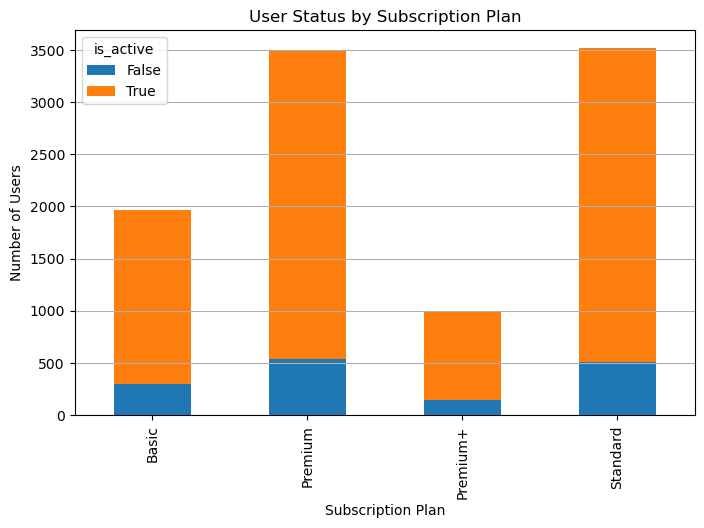

is_active,False,True
subscription_plan,,
Basic,297,1668
Premium,534,2964
Premium+,143,859
Standard,506,3007


In [52]:
user_status = pd.crosstab(df["subscription_plan"], df["is_active"])
user_status.plot(kind="bar",stacked=True,figsize=(8,5))
plt.title("User Status by Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Number of Users")
plt.grid(axis="y")
plt.show()

pd.crosstab(df["subscription_plan"], df["is_active"])

#### Insights:

* The Standard plan has the highest number of active users, followed closely by Premium.

* The Premium+ plan hass the least active users  by a significant margin, with only about 859 users.

* The Premium and Standard plans contribute the most to the total number of inactive users, representing the largest pools of potential churn.


C:\Users\SAFWAN\AppData\Local\Temp\ipykernel_16904\2103319575.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = df.groupby(["age_group","subscription_plan"]).size().unstack()


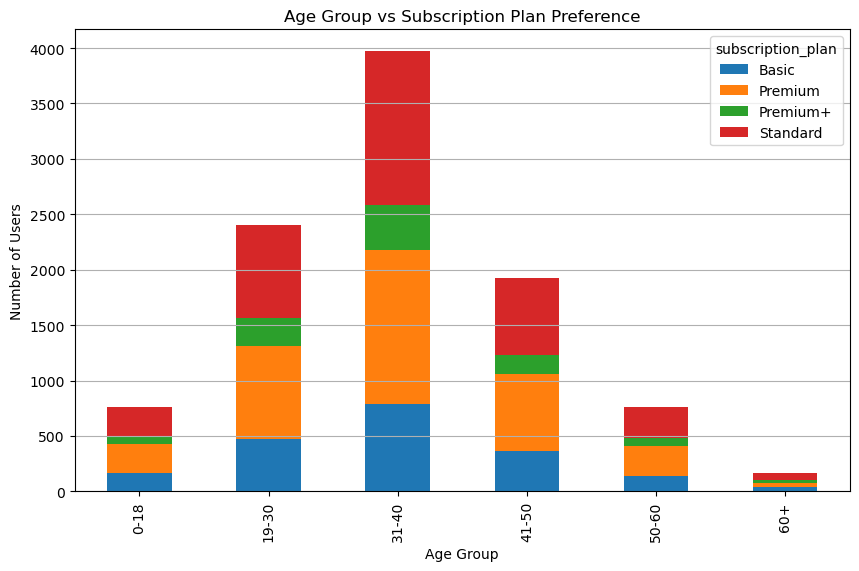

C:\Users\SAFWAN\AppData\Local\Temp\ipykernel_16904\2103319575.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["age_group","subscription_plan"]).size().unstack()


subscription_plan,Basic,Premium,Premium+,Standard
age_group,,,,
0-18,163,261,70,263
19-30,473,842,253,831
31-40,789,1387,409,1385
41-50,360,702,172,690
50-60,141,266,76,282
60+,39,40,22,62


In [53]:
count = df.groupby(["age_group","subscription_plan"]).size().unstack()
count.plot(kind="bar",stacked=True,figsize=(10,6))
plt.title("Age Group vs Subscription Plan Preference")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.grid(axis="y")
plt.show()

df.groupby(["age_group","subscription_plan"]).size().unstack()

#### Insights:

* The 31-40 age group has the highest number of users overall, with around 1,400 users.
 
* In almost every age group, the Standard and Premium plans are the most common, especially in the most numerous group (31-40).

* Standard and Premium are the dominant plans across all age groups from 19-50.

* The Premium+ and Basic plans consistently have the lowest number of subscribers in the dominant age groups (19-50).

* The 50-60 and 60+ age groups have the fewest users.

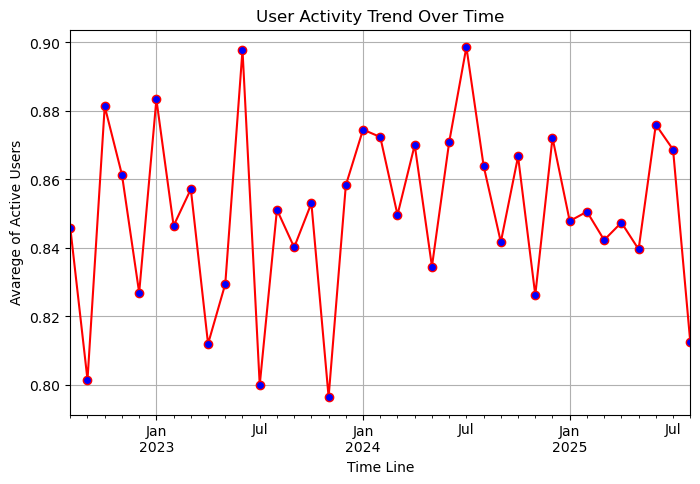

signup_month
2022-08    0.845890
2022-09    0.801527
2022-10    0.881295
2022-11    0.861345
2022-12    0.826923
2023-01    0.883333
2023-02    0.846457
2023-03    0.857143
2023-04    0.812000
2023-05    0.829480
2023-06    0.897727
2023-07    0.800000
2023-08    0.851145
2023-09    0.840164
2023-10    0.853035
2023-11    0.796491
2023-12    0.858268
2024-01    0.874525
2024-02    0.872340
2024-03    0.849650
2024-04    0.870036
2024-05    0.834559
2024-06    0.870849
2024-07    0.898601
2024-08    0.863946
2024-09    0.841699
2024-10    0.866667
2024-11    0.826241
2024-12    0.872131
2025-01    0.847826
2025-02    0.850575
2025-03    0.842294
2025-04    0.847390
2025-05    0.839590
2025-06    0.875940
2025-07    0.868687
2025-08    0.812500
Freq: M, Name: is_active, dtype: float64

In [54]:
activity_trend = df.groupby("signup_month")["is_active"].mean() 
plt.figure(figsize=(8,5))
activity_trend.plot(kind="line",color="r",marker="o",mfc="b")
plt.title("User Activity Trend Over Time")
plt.xlabel("Time Line")
plt.ylabel("Avarege of Active Users")
plt.grid()
plt.show()

df.groupby("signup_month")["is_active"].mean() 

#### Insights:

* The number of active users goes up and down every single year in a very clear way.
  
* Even with the ups and downs, the overall percentage of active users stays pretty much the same over the long run (from 2022 to 2025). It's not growing a lot, but it's not falling either.

* People are most active and use the service the most during the late summer months (around May to July). The line hits its highest points (near 90% activity) at this time every year.

### Multivariate Analysis

C:\Users\SAFWAN\AppData\Local\Temp\ipykernel_16904\258109982.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df,values="user_id",index="age_group",columns="subscription_plan",aggfunc="count")


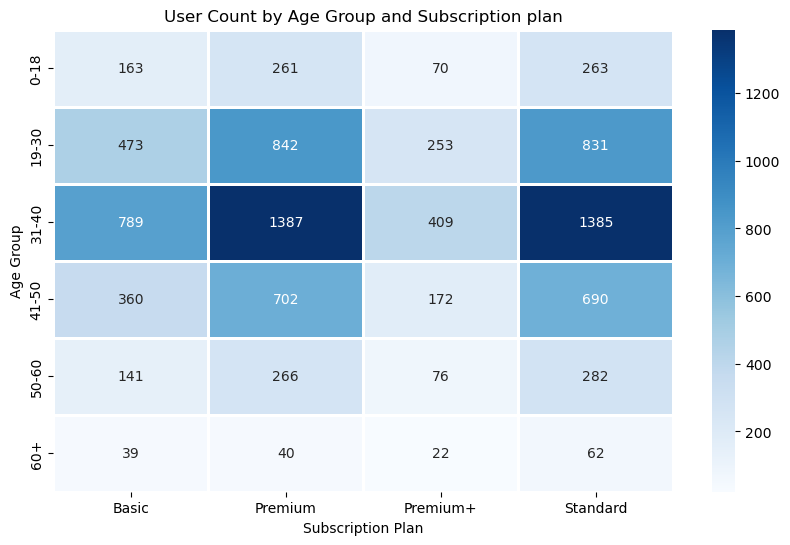

C:\Users\SAFWAN\AppData\Local\Temp\ipykernel_16904\258109982.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df,values="user_id",index="age_group",columns="subscription_plan",aggfunc="count")


subscription_plan,Basic,Premium,Premium+,Standard
age_group,,,,
0-18,163,261,70,263
19-30,473,842,253,831
31-40,789,1387,409,1385
41-50,360,702,172,690
50-60,141,266,76,282
60+,39,40,22,62


In [55]:
pivot = pd.pivot_table(df,values="user_id",index="age_group",columns="subscription_plan",aggfunc="count")
plt.figure(figsize=(10,6))
sns.heatmap(pivot,annot=True,fmt="d",cmap="Blues",linewidth=1)
plt.title("User Count by Age Group and Subscription plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Age Group")
plt.show()

pd.pivot_table(df,values="user_id",index="age_group",columns="subscription_plan",aggfunc="count")

#### Insights:

* The vast majority of users, and the highest counts overall, are found in the 31-40 Age Group.

* The highest single user count is 1,387 for the Premium plan in the 31-40 age group.

* The second highest is 1,385 for the Standard plan in the 31-40 age group.

* The Premium and Standard plans are significantly more popular than the Basic and Premium+ plans across almost all adult age groups.

C:\Users\SAFWAN\AppData\Local\Temp\ipykernel_16904\2740842414.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["age_group","subscription_plan"])["monthly_spend"].mean().reset_index()


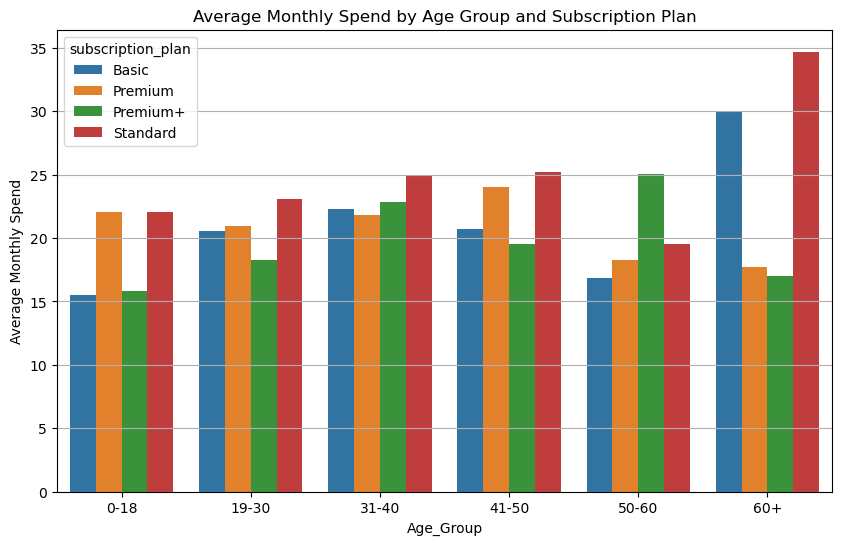

C:\Users\SAFWAN\AppData\Local\Temp\ipykernel_16904\2740842414.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["age_group","subscription_plan"])["monthly_spend"].mean()


age_group  subscription_plan
0-18       Basic                15.493932
           Premium              22.022702
           Premium+             15.850340
           Standard             22.081566
19-30      Basic                20.560847
           Premium              20.943509
           Premium+             18.251074
           Standard             23.062874
31-40      Basic                22.267666
           Premium              21.795011
           Premium+             22.822821
           Standard             24.953739
41-50      Basic                20.735025
           Premium              24.041370
           Premium+             19.547507
           Standard             25.232283
50-60      Basic                16.877976
           Premium              18.262759
           Premium+             25.004804
           Standard             19.542686
60+        Basic                30.023225
           Premium              17.734217
           Premium+             16.978313
     

In [56]:
grouped = df.groupby(["age_group","subscription_plan"])["monthly_spend"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=grouped,x="age_group",y="monthly_spend",hue="subscription_plan")
plt.title("Average Monthly Spend by Age Group and Subscription Plan")
plt.xlabel("Age_Group")
plt.ylabel("Average Monthly Spend")
plt.grid(axis="y")
plt.show()

df.groupby(["age_group","subscription_plan"])["monthly_spend"].mean()

#### Insights:

* 0-18: Spend is relatively flat across all plans, mostly around 15 to 22 average.

* 19-30: A slight decrease in spend for the Premium plan compared to 0-18, but the Standard plan spend is similar to 0-18.

* 31-40: Spend increases across all plans, reaching the peak for Premium and Premium+ plans (around 23-25) before the 60+ group.

* 41-50: Spends slightly less than the 31-40 group on average, but the Standard plan still shows high spend.

* 60+: This group has the highest average spend for the Basic and Standard plans, indicating they are the most valuable customers overall.

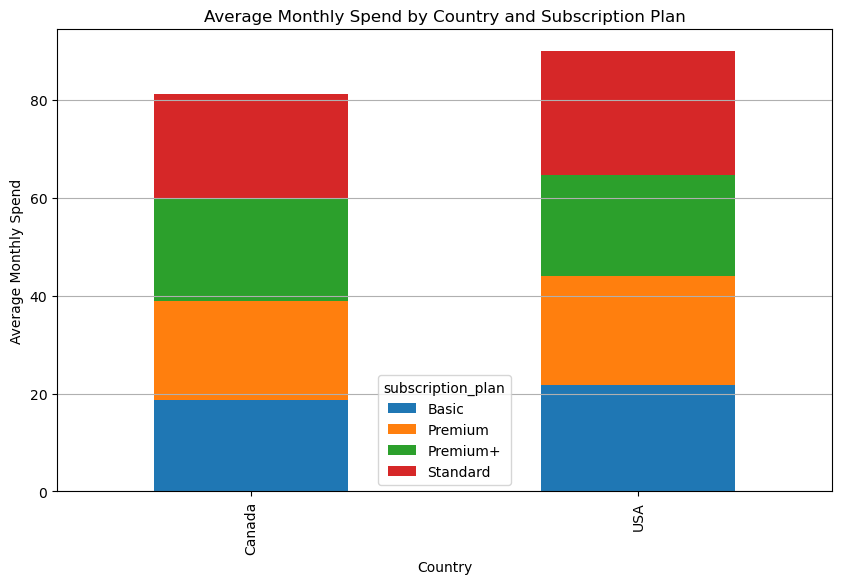

subscription_plan,Basic,Premium,Premium+,Standard
country,,,,
Canada,18.734314,20.211864,21.021221,21.280571
USA,21.678943,22.406636,20.521733,25.311017


In [57]:
pivot = df.pivot_table(values="monthly_spend",index="country",columns="subscription_plan",aggfunc="mean")
pivot.plot(kind="bar",stacked=True,figsize=(10,6))
plt.title("Average Monthly Spend by Country and Subscription Plan")
plt.xlabel("Country")
plt.ylabel("Average Monthly Spend")
plt.grid(axis="y")
plt.show()

df.pivot_table(values="monthly_spend",index="country",columns="subscription_plan",aggfunc="mean")

#### Insights:

* The average monthly spend is generally higher in the USA than in Canada for every subscription plan.

* In both countries, the Standard plan typically results in the highest average monthly spend.

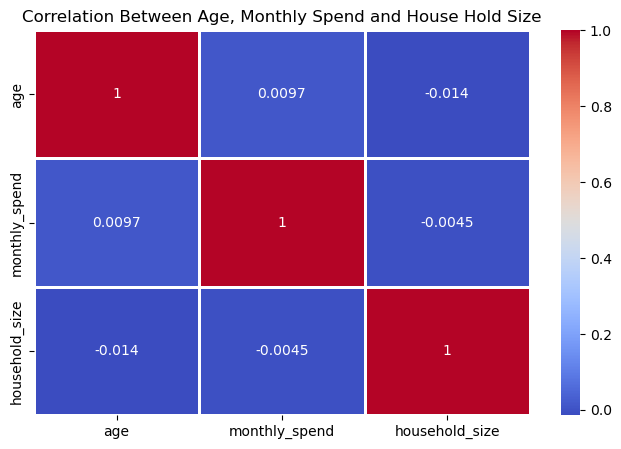

,age,monthly_spend,household_size
age,1.000000,0.009727,-0.014153
monthly_spend,0.009727,1.000000,-0.004462
household_size,-0.014153,-0.004462,1.000000


In [58]:
corr = df[["age","monthly_spend","household_size"]].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,cmap="coolwarm",linewidth=1)
plt.title("Correlation Between Age, Monthly Spend and House Hold Size")
plt.show()

df[["age","monthly_spend","household_size"]].corr()

#### Insights:

* Age is not correlated with Monthly Spend.

* Household Size is not correlated with Monthly Spend.

* Age is not correlated with Household Size.

* All three correlation are very close to zero, meaning age, monthly spend and household size are essentially independent of each other in this data

In [59]:
# Export Final DataFrame to CSV

df.to_csv("Netflix_Streaming_Platform_Users_EDA(Exported).csv",index=False)

### Key EDA Findings

* Prime Age Group: The 31 to 40-year-olds are the largest single age group subscribing to the service.

* The Standard Plan Reigns: The Standard subscription is the single most popular choice across all users.

* 2023: New Subscription Count Peaked in Late 2023.

* The USA is the Main Market: The vast majority of the customer base (around 87%) is located in the United States.

* Cheaper Customers Are Churn Risks: Customers who spend less money monthly are the most likely to cancel their subscription.

* Family Size Drives Spending: Subscribers with larger households consistently spend more on their plan than subscribers from smaller households.

### Recommendations

* Early Engagement: Boost Early Activity. Users who are more active early on are less likely to leave. Send personalized welcome content, highlight key features in the first week, and use notifications to drive daily platform usage.

* Targeted Upselling: Promote Upgrades Based on Usage. Use data on household size and monthly spend to find Basic or Standard users who frequently hit stream limits. Target them with discounts or a free trial to the next tier (Standard or Premium).	Users who already use the service heavily are the easiest to convince to pay more for a better plan.

* Pricing Tiers	: Simplify Plan Choices. If the difference between Basic, Standard, and Premium is confusing or minimal, consider streamlining to two powerful tiers (e.g., Standard and Premium). A simpler choice reduces customer confusion.	Too many similar plans can overwhelm users and slow down decision-making.

* Age and Content: Customize Content Recommendations by Age Group. Use the age group data to ensure content discovery algorithms prioritize shows and movies most popular within that demographic (e.g., kids' content for 0-18, specific genres for 19-30). Personalized content keeps users engaged and watching longer.